In [1]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as  plt
from util.char_tool import CharSimilarityHelper
import arviz as az

plt.rcParams["font.sans-serif"]='Noto Sans CJK JP'
plt.rcParams['axes.unicode_minus']=False
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")


images_t = torch.load("recdatassd/TKHMTH2200_test_all/dict_test_all.pt")
images_t.keys()


dict_keys(['chars', 'sp_tokens', 'protos', 'master', 'servants', 'foes', 'relationships', 'achars', 'label_dict'])

0.138671875


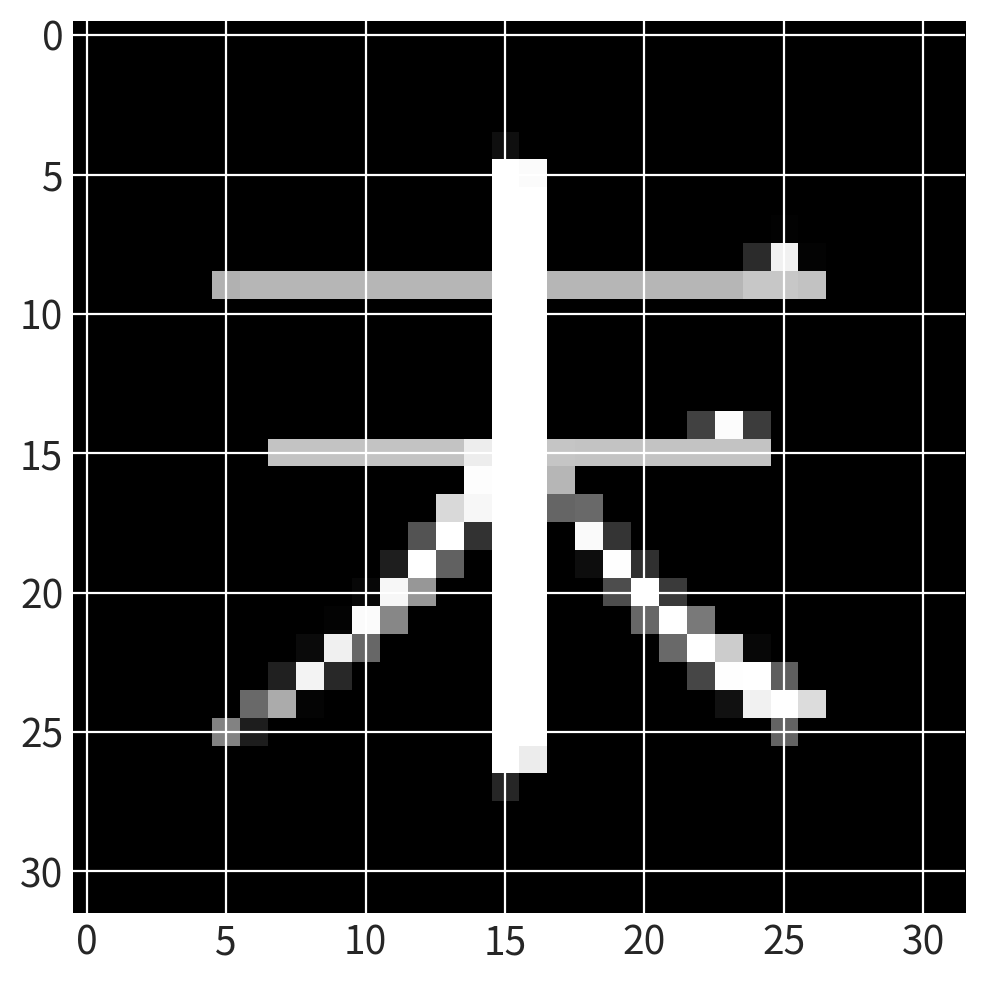

In [2]:
def get_char_img(char, images_t):
    i = images_t['label_dict'][char]
    char = images_t['chars'][i-1]
    img_gray = images_t['protos'][i][0,0,:,:]
    return img_gray

def cal_char_complex(char, images_t):
    img_gray = get_char_img(char, images_t)

    xs, ys = torch.where(img_gray >0)
    x1,y1,x2,y2 = min(xs),min(ys), max(xs), max(ys)

    area_all = len(img_gray.reshape(-1))
    none_zero = len(xs)

    complex_r = none_zero/area_all
    return  complex_r, img_gray

char = "末"
complex_r, img_gray = cal_char_complex(char, images_t)
print(complex_r)
plt.imshow(img_gray,cmap='gray');

In [3]:
from util.eval_res import MakaEval

# f_path = "runtime/OSTR_C2J_DTA_Only_MTH/eval_res/TKHMTH2200_spindle_v1_TKHMTH2200__E24.pt"
# f_path = "runtime/OSTR_C2J_DTA_Only_MTH/eval_res/TKHMTH2200_spindle_ori_TKHMTH2200__E23.pt"
f_path = "runtime/OSTR_C2J_DTA_Only_MTH/eval_res/TKHMTH2200_spindle_v5_TKHMTH2200__E63.pt"
f_path = "runtime/OSTR_C2J_DTA_Only_MTH/eval_res/TKHMTH2200_spindle_ori_TKHMTH2200__E23.pt"
f_path = "runtime/OSTR_C2J_DTA_Only_MTH/eval_res/TKHMTH2200_spindle_v8_TKHMTH2200__E23.pt"
f_path = "runtime/OSTR_C2J_DTA_Only_MTH/eval_res/TKHMTH2200_spindle_v7_TKHMTH2200__E23.pt"
f_path = "runtime/OSTR_C2J_DTA_Only_MTH/eval_res/TKHMTH2200_spindle_v4_TKHMTH2200__E23.pt"
f_path = "runtime/OSTR_C2J_DTA_Only_MTH/eval_res/TKHMTH2200_spindle_ori_vs_v8_TKHMTH2200_127.pt"
f_path = "runtime/OSTR_C2J_DTA_Only_MTH/eval_res/TKHMTH2200_spindle_v8_TKHMTH2200_latest.pt"
f_path = "runtime/OSTR_C2J_DTA_Only_MTH/eval_res/TKHMTH2200_spindle_v10_TKHMTH2200_127.pt"
maka_eval:MakaEval = torch.load(f_path)
print(maka_eval)
print(len(maka_eval.total_sub_cs))


TS:25262 CR:0.9527 AR:0.9421 ACC:0.7077 L_ACC:0.914733591956298 L_ins_N:2789 L_del_N:1550 L_sub_N:10871
10871


In [4]:
import os

dst_dir = "runtime/TKHMTH2200_spindle_v10_TKHMTH2200_127"
os.makedirs(dst_dir, exist_ok=True)


for index,(pred, gt) in enumerate(zip(maka_eval.all_preds, maka_eval.all_gts)):
    # print(index, pred, gt)
    # if index == 10:
        # break
    _ss = pred + gt
    if ',' in _ss:
        raise Exception("error")
    if index % 2000 == 0:
        print(index, len(maka_eval.all_preds))
    
    with open(os.path.join(dst_dir, f"{index}.txt"), 'w+') as f:
        f.write(f"{pred},{gt}")


0 25262
2000 25262
4000 25262
6000 25262
8000 25262
10000 25262
12000 25262
14000 25262
16000 25262
18000 25262
20000 25262
22000 25262
24000 25262


In [2]:
import lmdb
from data_root import find_data_root

# 注意lmdb的路径只到文件夹
db_path = f"recdatassd/TKHMTH2200_test_all"
# 打开数据库
env = lmdb.open(db_path)
# 开启事务
with env.begin(write=False) as txn:
    # 节点数量
    length = txn.stat()['entries']
    print(length)
    
    # 得到所有的key列表(注意key是字节码，需要decode才能变成python中的str)
    keys = list(txn.cursor().iternext(values=False))
    print(len(keys))
# 关闭数据库
env.close()   






75787
75787


In [12]:

import cv2
import os
import numpy as np


dst_dir = "runtime/TKHMTH2200_test_images"
os.makedirs(dst_dir, exist_ok=True)



# 打开数据库
env = lmdb.open(db_path)
# 开启事务
with env.begin(write=False) as txn:

    for ii in range(25262):
        if ii % 2000 == 0:
            print(ii)
        
        i_key = f"image-{ii:09d}"
        imgbuf = txn.get(i_key.encode())
        img = cv2.imdecode(np.frombuffer(imgbuf, np.uint8),  cv2.IMREAD_COLOR)
        
        img_file_name = os.path.join(dst_dir, f"{ii:09d}.jpg")
        cv2.imwrite(img_file_name, img)
        

# 关闭数据库
env.close()

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000


b'ADD'

In [6]:
new_eval = MakaEval()

for pred,gt in zip(maka_eval.all_preds,maka_eval.all_gts):
    pred = pred.replace("#","")
    gt = gt.replace("#","")
    new_eval.continue_eval(pred,gt)
    
print(new_eval)




TS:25262 CR:0.9489 AR:0.9396 ACC:0.7058 L_ACC:0.9250653154936268 L_ins_N:2434 L_del_N:1644 L_sub_N:11779


In [4]:
char_pinshu = {}
for gt in maka_eval.all_gts:
    for c in gt:
        if c not in char_pinshu:
            char_pinshu[c] = 0
        char_pinshu[c] += 1


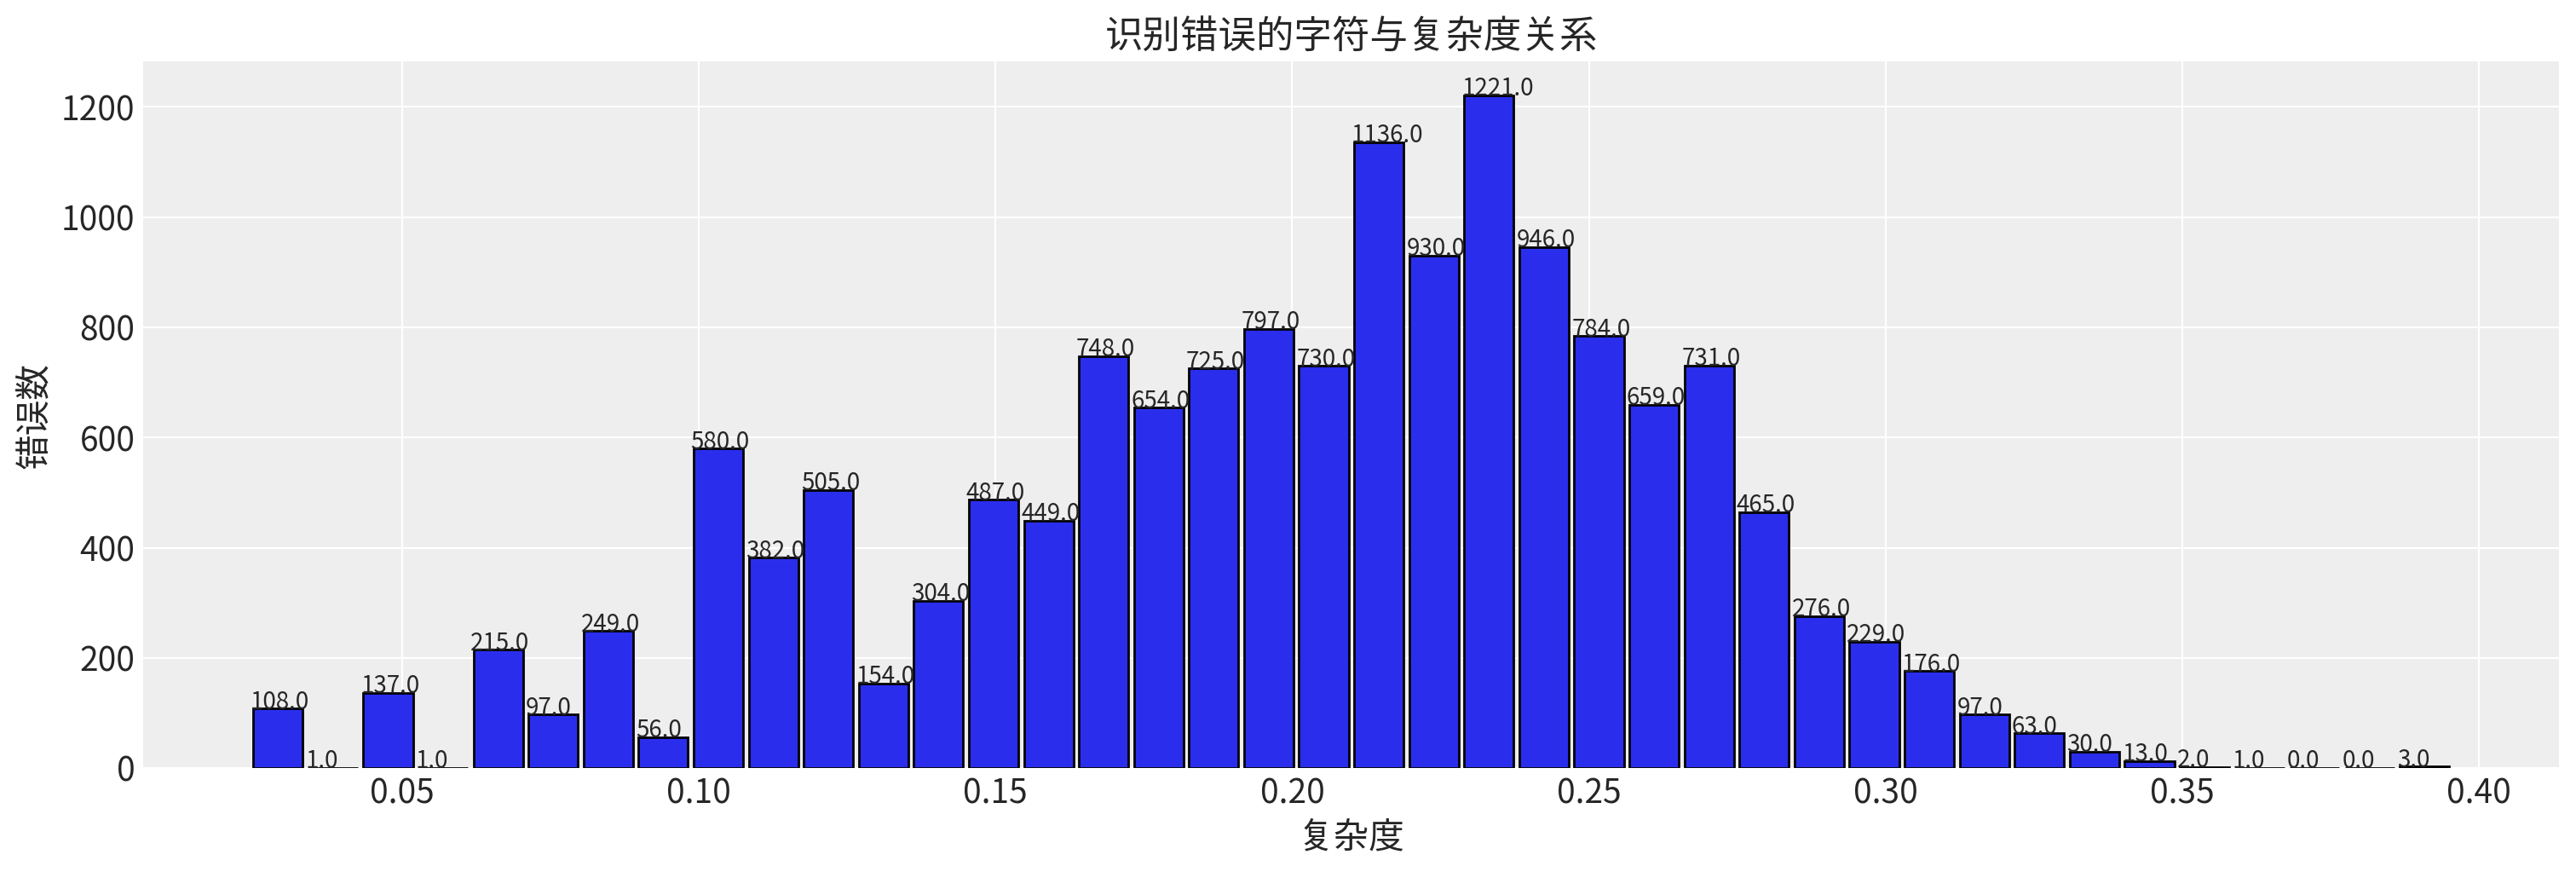

In [5]:
import os
complex_res_save_path = "runtime/complex_res.pt"
if os.path.exists(complex_res_save_path):
    complex_res = torch.load(complex_res_save_path)
else:
    complex_res = []
    for ele in maka_eval.total_sub_cs:
        _,_,pred,gt,_= ele
        complex_r, img_gray = cal_char_complex(gt, images_t)
        complex_res.append(complex_r)
    os.makedirs(os.path.dirname(complex_res_save_path), exist_ok=True)
    torch.save(complex_res, complex_res_save_path)

# '掲', '揭'
plt.figure(figsize=(15,5))
nums,bins,patches = plt.hist(complex_res,rwidth=0.9, bins=40,edgecolor='k')
for num,bin in zip(nums,bins):
    plt.annotate(num,xy=(bin,num), xytext=(bin+0.00,num))
plt.title("识别错误的字符与复杂度关系")
plt.xlabel("复杂度")
plt.ylabel("错误数")
plt.show()

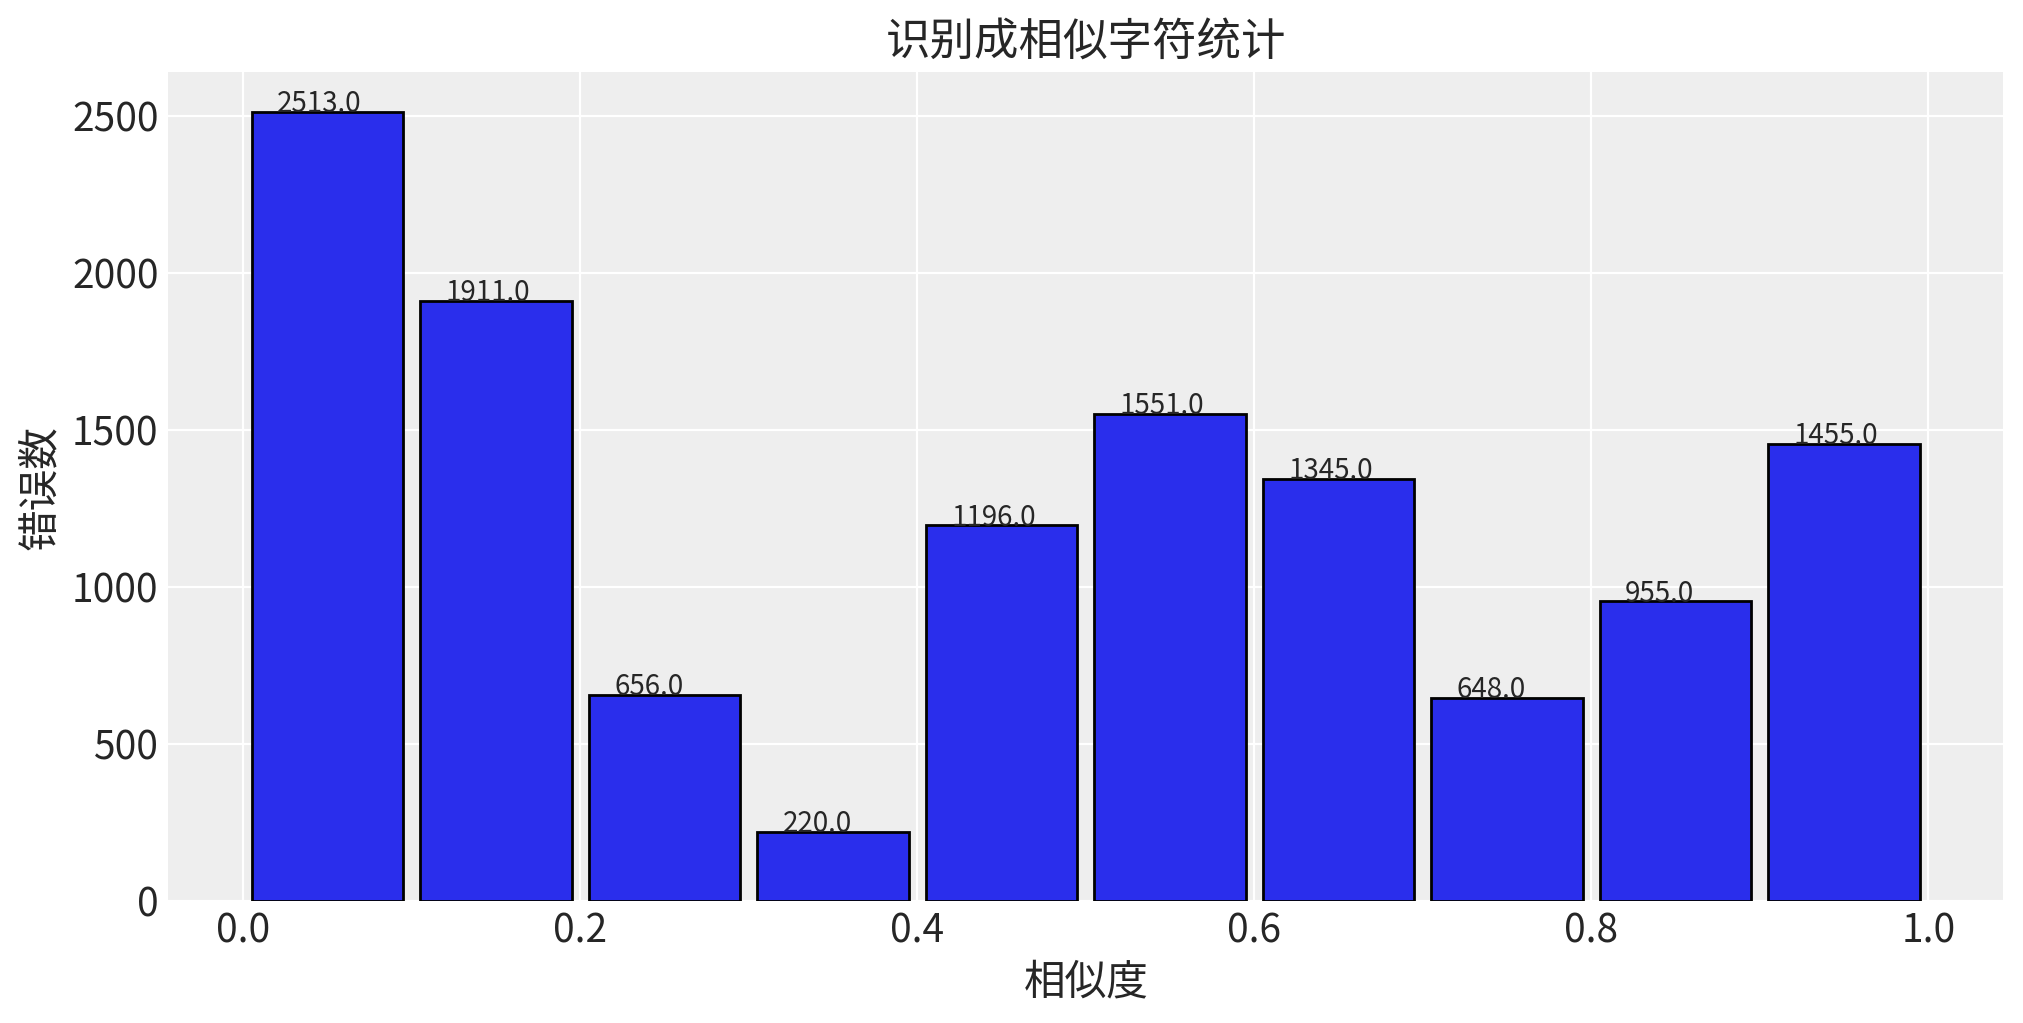

In [9]:
cs_helper = CharSimilarityHelper()
sim_res = []
for ele in maka_eval.total_sub_cs:
    _,_,pred,gt,_= ele
    try:
        r = cs_helper.similar(pred, gt)
        sim_res.append(r)
    except Exception:
        pass

plt.figure(figsize=(10,5))
nums,bins,patches = plt.hist(sim_res,rwidth=0.9, bins=10,edgecolor='k',range=(0,1))
for num,bin in zip(nums,bins):
    plt.annotate(num,xy=(bin,num), xytext=(bin+0.02,num))
plt.title("识别成相似字符统计")
plt.xlabel("相似度")
plt.ylabel("错误数")
plt.show()


466 3954
300 14838
642 262700


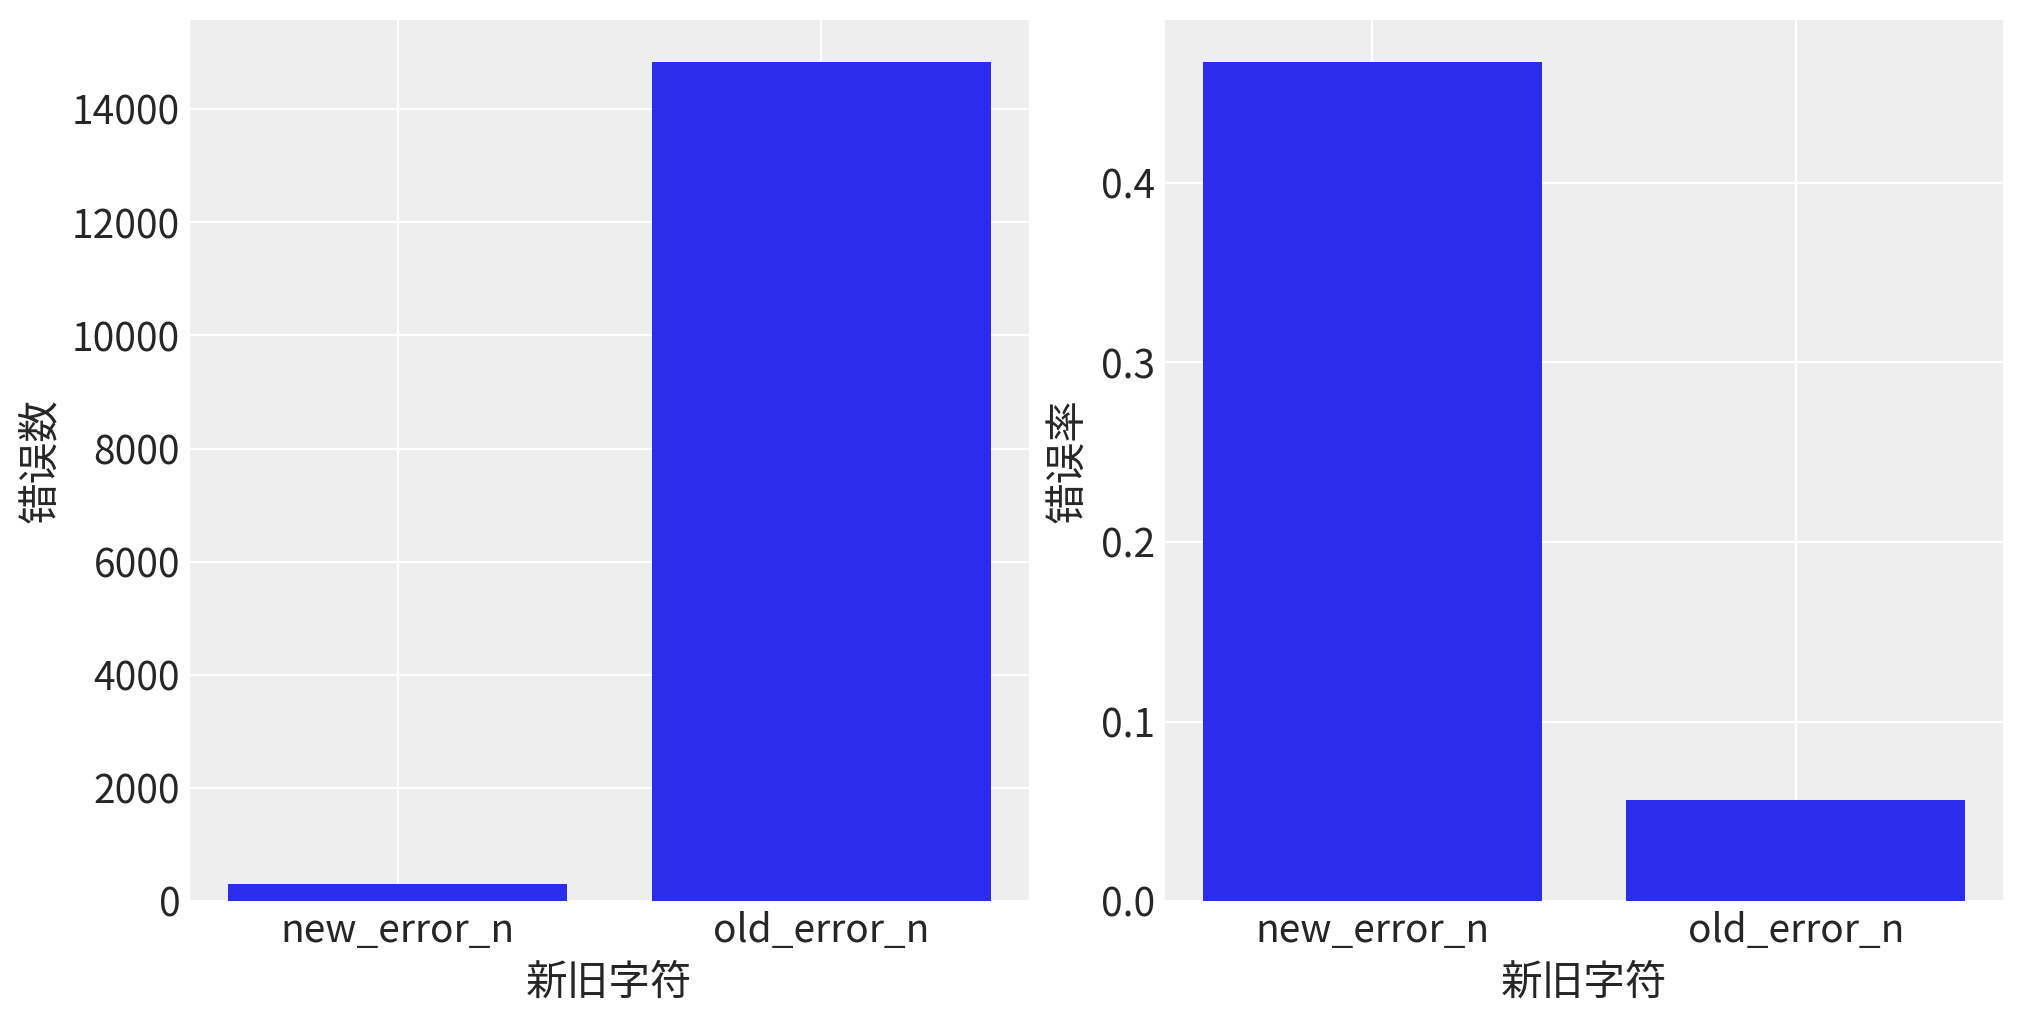

In [8]:

train_chars = set()
test_chars = set()

with open("recdatassd/TKHMTH2200_test_all/alphabet_TKHMTH2200_test_all.txt", 'r')  as f:
    content = f.read()
    chars = content.splitlines()
    test_chars.update(chars)
    
with open("recdatassd/TKHMTH2200_train/alphabet_TKHMTH2200_train.txt", 'r')  as f:
    content = f.read()
    chars = content.splitlines()
    train_chars.update(chars)

new_chars = test_chars - train_chars
old_chars = test_chars & train_chars

new_error_n, old_error_n = 0,0
for ele in maka_eval.total_sub_cs:
    _,_,pred,gt,_= ele
    if gt in new_chars:
        new_error_n += 1
    elif gt in old_chars:
        old_error_n += 1

num_list = [new_error_n,old_error_n]
name_list = ['new_error_n','old_error_n']
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 5))
axe1, axe2 = axes

axe1.bar(range(len(num_list)), num_list, tick_label=name_list)
axe1.set_xlabel("新旧字符")
axe1.set_ylabel("错误数")

all_gt_chars = []
all_old_chars_n = 0
all_new_chars_n = 0

for gt in maka_eval.all_gts:
    all_gt_chars += list(gt)
    for c in gt:
        if c in old_chars:
            all_old_chars_n += 1
        elif c in new_chars:
            all_new_chars_n +=1

# plt.show()
num_list = [new_error_n/all_new_chars_n,old_error_n/all_old_chars_n]
axe2.bar(range(len(num_list)), num_list, tick_label=name_list)
axe2.set_xlabel("新旧字符")
axe2.set_ylabel("错误率")

# plt.bar( num_list, name_list=name_list)
print(len(new_chars), len(old_chars))
print(new_error_n, old_error_n)
print(all_new_chars_n, all_old_chars_n)

In [7]:
print(len(maka_eval.all_gts))


25262


/home/izhangxm/miniconda3/envs/vsdf/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131141 (\N{CJK UNIFIED IDEOGRAPH-20045}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


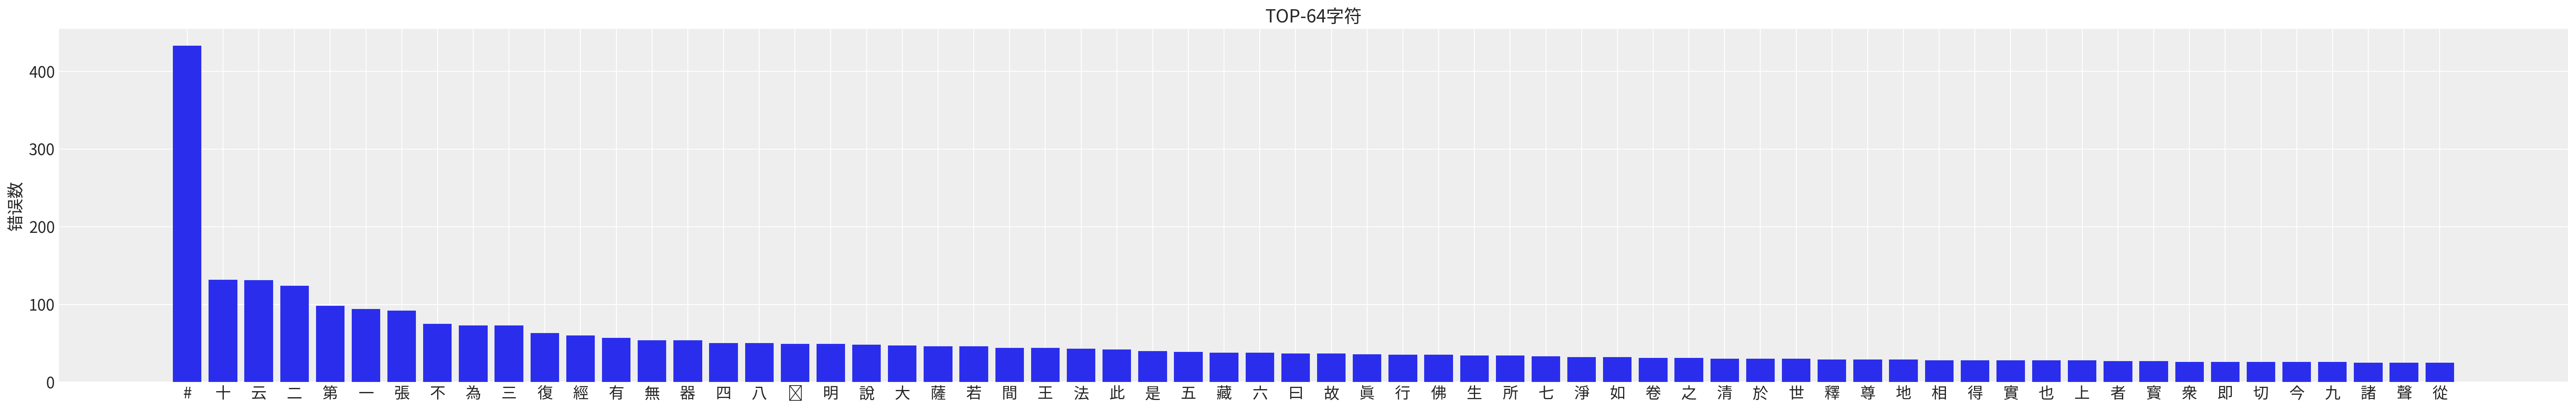

/home/izhangxm/miniconda3/envs/vsdf/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 167801 (\N{CJK UNIFIED IDEOGRAPH-28F79}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/izhangxm/miniconda3/envs/vsdf/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 166040 (\N{CJK UNIFIED IDEOGRAPH-28898}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/izhangxm/miniconda3/envs/vsdf/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 163109 (\N{CJK UNIFIED IDEOGRAPH-27D25}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/izhangxm/miniconda3/envs/vsdf/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 162378 (\N{CJK UNIFIED IDEOGRAPH-27A4A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/izhangxm/miniconda3/envs/vsdf/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: User

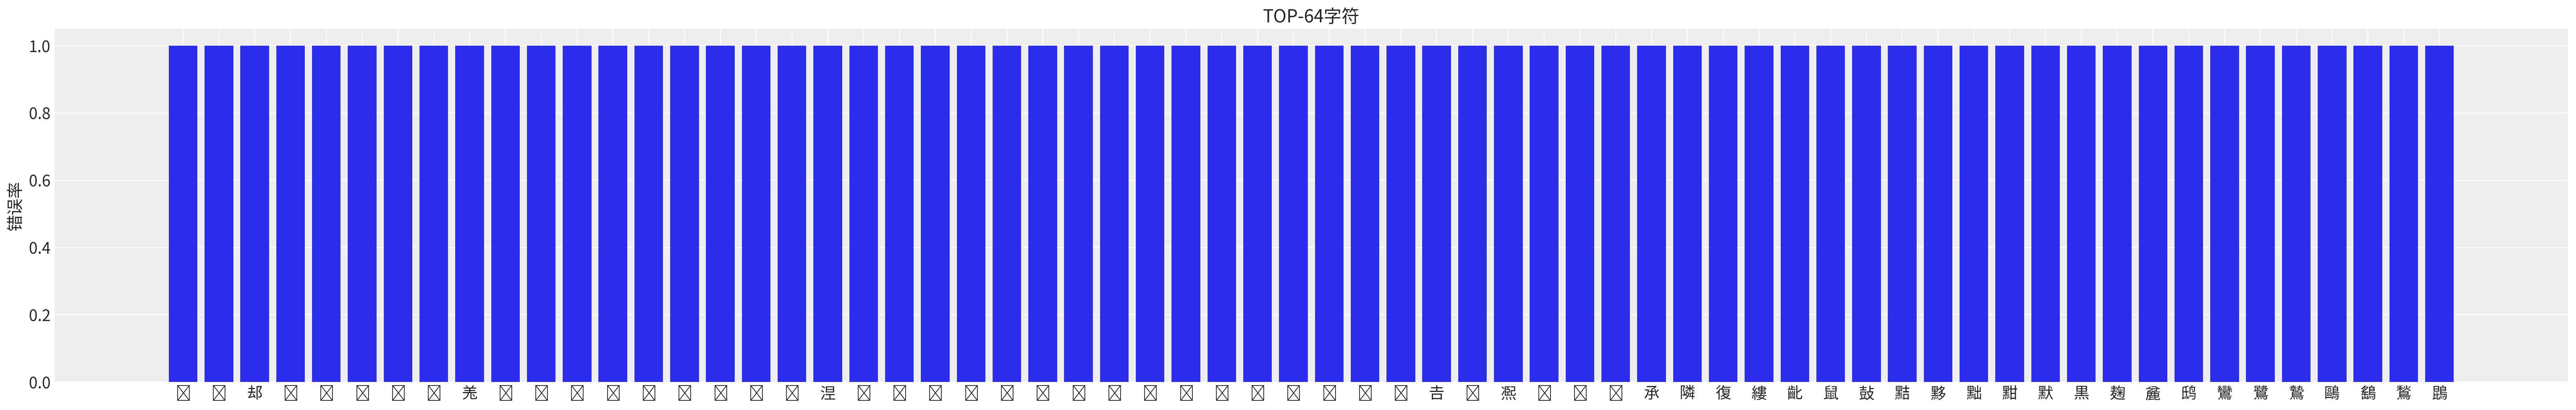

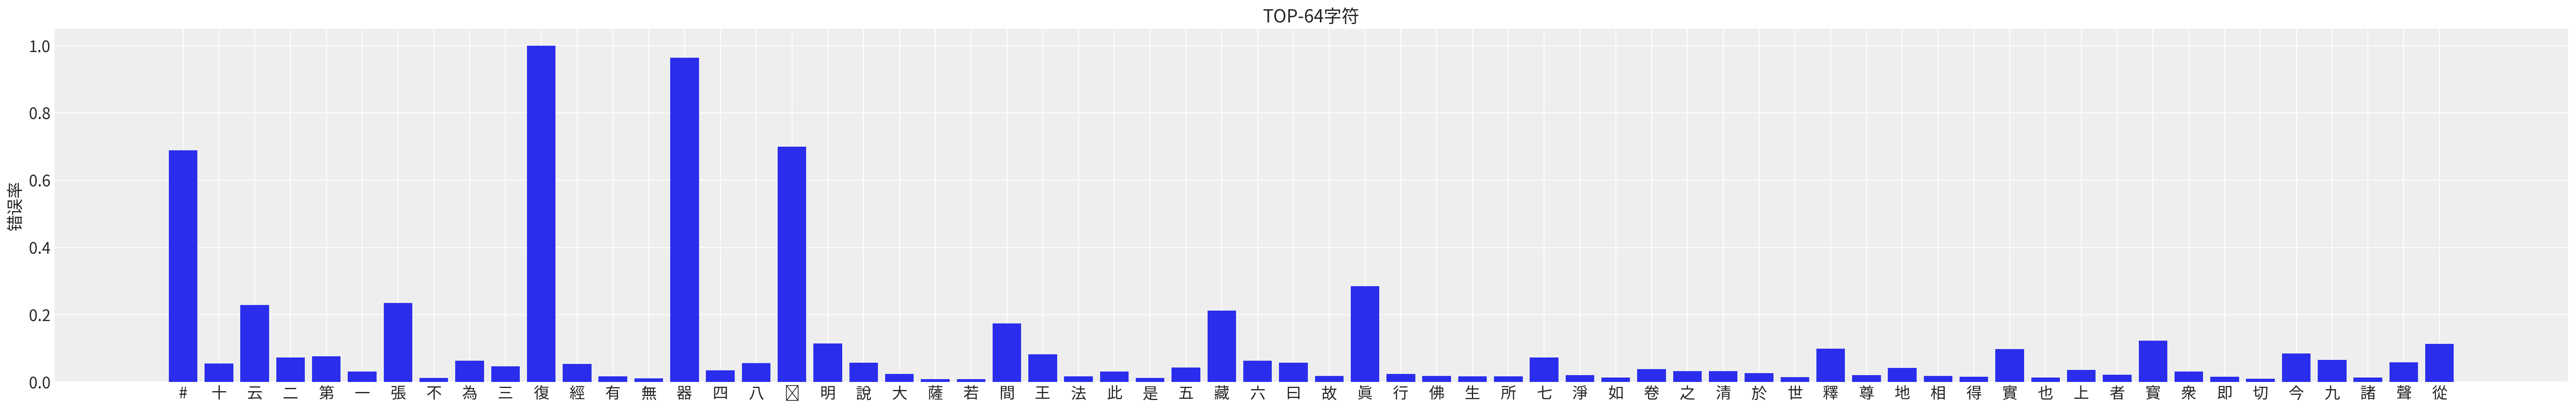

('復', [1.0, 63, 63])
('器', [0.9642857142857143, 54, 56])
('𠁅', [0.7, 49, 70])
('#', [0.6894904458598726, 433, 628])
('誡', [0.6774193548387096, 21, 31])
('㡳', [0.4444444444444444, 16, 36])
('懴', [0.4411764705882353, 15, 34])
('興', [0.40425531914893614, 19, 47])
('𢘤', [0.3939393939393939, 13, 33])
('寶', [0.3783783783783784, 14, 37])
('含', [0.3, 12, 40])
('眞', [0.2857142857142857, 36, 126])
('牟', [0.27906976744186046, 12, 43])
('圓', [0.2777777777777778, 15, 54])
('詔', [0.2777777777777778, 10, 36])
('𢙣', [0.2702702702702703, 10, 37])
('氏', [0.26666666666666666, 8, 30])
('盛', [0.2619047619047619, 11, 42])
('元', [0.25, 9, 36])
('末', [0.24615384615384617, 16, 65])
('洲', [0.24242424242424243, 8, 33])
('張', [0.23529411764705882, 92, 391])
('云', [0.22942206654991243, 131, 571])
('開', [0.22857142857142856, 24, 105])
('雨', [0.22857142857142856, 8, 35])
('指', [0.2222222222222222, 8, 36])
('𣈆', [0.21621621621621623, 8, 37])
('藏', [0.2122905027932961, 38, 179])
('感', [0.21212121212121213, 7, 33])
('州

In [8]:
char_errors_n = {}
for ele in maka_eval.total_sub_cs:
    _,_,pred,gt,_= ele
    if gt not in char_errors_n:
        char_errors_n[gt] = 0
    char_errors_n[gt] += 1
char_errors_ = sorted(char_errors_n.items(), key=lambda kv:(kv[1], kv[0]))
char_errors_.reverse()


char_errors_rate = {}
for c,n in char_errors_n.items():
    char_errors_rate[c] = n/char_pinshu[c]
char_errors_rate_ = sorted(char_errors_rate.items(), key=lambda kv:(kv[1], kv[0]))
char_errors_rate_.reverse()


top_k = 64

data = char_errors_[:top_k]
data = {k:v for k,v in data}
plt.figure(figsize=(32,5))
num_list = list(data.values())
name_list = list(data.keys())
plt.bar(range(len(num_list)), num_list, tick_label=name_list)

plt.title(f"TOP-{top_k}字符")
plt.ylabel("错误数")
plt.show()


data1 = char_errors_rate_[:top_k]
data1 = {k:v for k,v in data1}
plt.figure(figsize=(32,5))
num_list = list(data1.values())
name_list = list(data1.keys())
plt.bar(range(len(num_list)), num_list, tick_label=name_list)

plt.title(f"TOP-{top_k}字符")
plt.ylabel("错误率")
plt.show()



chars = data.keys()

plt.figure(figsize=(32,5))

num_list = []
for c in chars:
    num_list += [char_errors_rate[c]]
name_list = list(data.keys())
plt.bar(range(len(num_list)), num_list, tick_label=name_list)

plt.title(f"TOP-{top_k}字符")
plt.ylabel("错误率")
plt.show()


rrr = {}
for c,n in char_errors_n.items():
    c_total_n = char_pinshu[c]
    rrr[c] = [n/c_total_n , n, c_total_n]
aa = sorted(rrr.items(), key=lambda kv:(kv[1], kv[0]))
aa.reverse()
for ele in aa:
    _, v = ele
    _,_,_n = v
    if _n < 30:
        continue
    print(ele)

# print(aa)